In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy

In [2]:
df = pd.read_csv("bitcoin/submission.csv")

# Descriptive stats

In [3]:
# Pre-processing
df = df.dropna(subset = "selftext")
df = df[ df["removed"] != 1]


In [4]:
# Make a graph of the user
df.describe()

,created,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts
count,1.605000e+04,1.605000e+04,1.605000e+04,16050.0,16050.0,16050.000000,16050.0,16050.000000,16050.000000,16050.000000,16050.0,16050.000000,16050.00000,16050.000000,16050.000000,16050.000000,16050.000000
mean,1.655133e+09,1.655188e+09,1.625322e+08,0.0,0.0,0.000312,0.0,0.000249,0.992399,0.000312,0.0,0.672204,23.42567,0.007290,0.154206,28.525171,0.064237
std,9.495426e+06,9.501511e+06,4.924072e+08,0.0,0.0,0.017648,0.0,0.015785,0.086856,0.017648,0.0,0.213842,87.61678,0.092104,0.885118,66.247822,0.350246
min,1.640996e+09,1.641140e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.040000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.646612e+09,1.646657e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.500000,0.00000,0.000000,0.000000,5.000000,0.000000
50%,1.654359e+09,1.654405e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.690000,3.00000,0.000000,0.000000,11.000000,0.000000
75%,1.663212e+09,1.663261e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.840000,11.00000,0.000000,0.000000,25.000000,0.000000
max,1.672530e+09,1.672537e+09,1.672529e+09,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,2450.00000,3.000000,35.000000,1884.000000,13.000000


In [5]:
unique_users = df["author"].unique()
# Count nb of posts per user
posts_per_user = df["author"].value_counts()

In [6]:
posts_per_user.sort_values(ascending=False, inplace=True)

<Axes: >

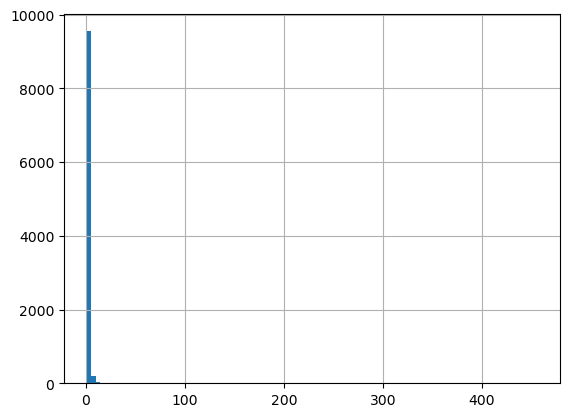

In [7]:
posts_per_user.hist(bins=100)

# SpaCy pipeline

In [9]:
from transformers import pipeline

MODEL = "cardiffnlp/twitter-roberta-base-2021-124m"
fill_mask = pipeline("fill-mask", model=MODEL, tokenizer=MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.